<a href="https://colab.research.google.com/github/pas3n7/ColabDataScienceLearning/blob/main/Coronavirusbytrumpiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we try to do coronavirus data stuff


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
elecdata = pd.read_csv("/content/drive/MyDrive/Data/countypres_2000-2016.csv")

In [ ]:
# is2016 = elecdata['year'] == 2016
# elecdata[is2016]
elec2016 = elecdata[elecdata['year'] == 2016]
elec2016 = elecdata[elecdata['candidate'] == 'Donald Trump']
elec2016 = elec2016.dropna()
elec2016 = elec2016.drop(columns=['office', 'party', 'version'])

In [ ]:
popdataurl = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
popdata = pd.read_csv(popdataurl, encoding='latin-1')

In [ ]:
popdata = popdata[popdata['COUNTY'] != 0]

In [ ]:
elec2016 = elec2016.assign(trumpiness =elec2016['candidatevotes'] / elec2016['totalvotes'])
elec2016 = elec2016.drop(columns=['candidate', 'candidatevotes'])

In [ ]:
cvdataurl = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
coronadata = pd.read_csv(cvdataurl)

In [ ]:
coronadata

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3258,3300,3329,3426,3510,3570,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190,4239,4268,4305,4336,4546,4645,4705,4770,4847,4879,4902,4970,4998,5075,5103,5154,5184,5198,5227,5257
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10665,10806,10898,11061,11212,11364,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601,13823,13955,14064,14187,14440,14656,14845,15052,15202,15327,15417,15572,15701,15841,16002,16176,16251,16346,16513,16653
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1269,1272,1275,1292,1296,1309,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514,1517,1528,1530,1533,1575,1597,1614,1634,1648,1658,1663,1679,1685,1696,1712,1723,1729,1730,1738,1760
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1417,1441,1455,1504,1520,1548,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834,1854,1863,1882,1885,1923,1944,1981,2015,2038,2051,2060,2090,2109,2113,2130,2144,2151,2162,2170,2188
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3744,3776,3803,3881,3950,4036,4118,4191,4218,4234,4313,4367,4405,4441,4446,4465,4483,4535,4584,4641,4693,4729,4746,4771,4849,4898,4957,5018,5047,5066,5080,5134,5170,5219,5264,5292,5304,5308,5320,5376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1886,1905,1930,1940,1958,1974,1990,1992,2002,2019,2033,2039,2039,2039,2080,2080,2108,2112,2121,2138,2138,2145,2159,2199,2216,2239,2260,2346,2348,2353,2447,2497,2502,2579,2605,2614,2685,2753,2769,2788
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1289,1307,1327,1352,1363,1372,1399,1406,1416,1446,1460,1475,1475,1475,1495,1497,1507,1521,1540,1558,1558,1569,1570,1589,1597,1618,1668,1693,1693,1708,1744,1764,1774,1794,1806,1813,1817,1833,1843,1852
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,629,639,644,659,662,665,690,695,699,713,720,726,726,726,751,747,763,764,768,781,781,782,783,784,783,789,794,797,80

In [ ]:
coronadata = coronadata.iloc[:, 4:6].assign(lastweek = coronadata.iloc[:, -1])

In [ ]:
coronadata

,FIPS,Admin2,lastweek
0,1001.0,Autauga,5257
1,1003.0,Baldwin,16653
2,1005.0,Barbour,1760
3,1007.0,Bibb,2188
4,1009.0,Blount,5376
...,...,...,...
3335,56039.0,Teton,2788
3336,56041.0,Uinta,1852
3337,90056.0,Unassigned,0
3338,56043.0,Washakie,846


In [ ]:
combined = pd.merge(left=elec2016, right=coronadata, on="FIPS")

In [ ]:
popcounties = popdata['STATE'].astype(str) + popdata['COUNTY'].astype(str).apply('{:0>3}'.format)
popcounties = popcounties.astype(float)
popdata = pd.DataFrame({"FIPS": popcounties, "population" : popdata["POPESTIMATE2019"]})

In [ ]:
combined = pd.merge(left=combined, right=popdata, on="FIPS")

In [ ]:
combined['infectiness'] = combined['lastweek'] / combined['population']

In [ ]:
##---- Variables for data selection in the graph
minpop = 0
maxpop = 7_000

Text(0, 0.5, 'Infectiness')

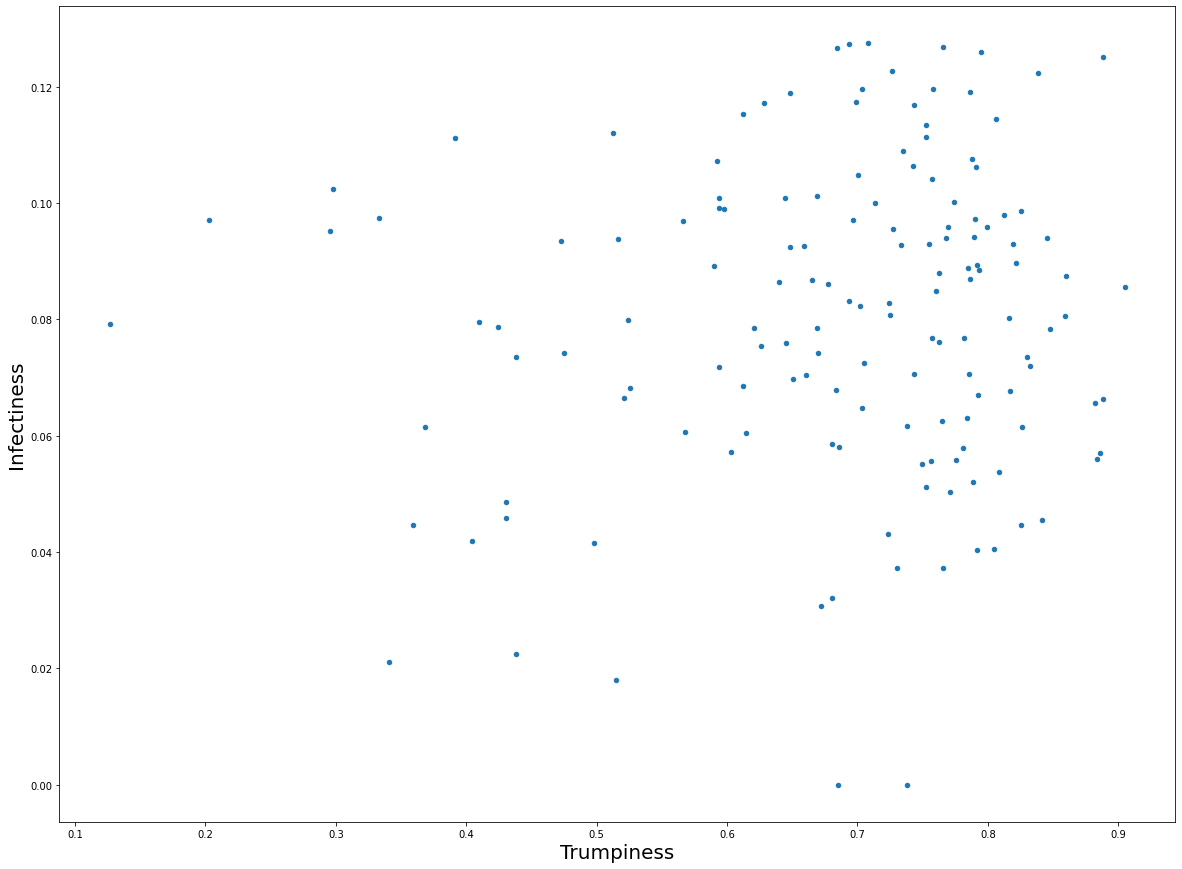

In [ ]:
combinout = combined[np.abs(stats.zscore(combined['infectiness']) < 2)]
combinout = combinout[(combinout['population'] > minpop) & (combinout['population'] < maxpop)]
combinout.plot.scatter(x="trumpiness", y="infectiness", figsize=(20, 15))
plt.xlabel('Trumpiness', fontsize=20)
plt.ylabel('Infectiness', fontsize=20)